## Use the iris database to answer the following quesitons:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### What does the distribution of petal lengths look like?

In [2]:
iris = sns.load_dataset('iris')

iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

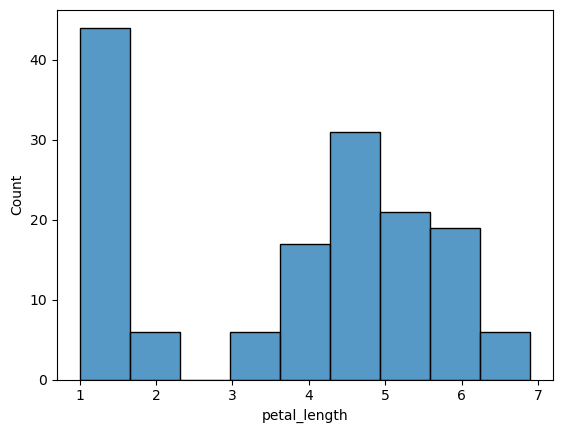

In [3]:
sns.histplot(iris.petal_length)
plt.show()

### Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

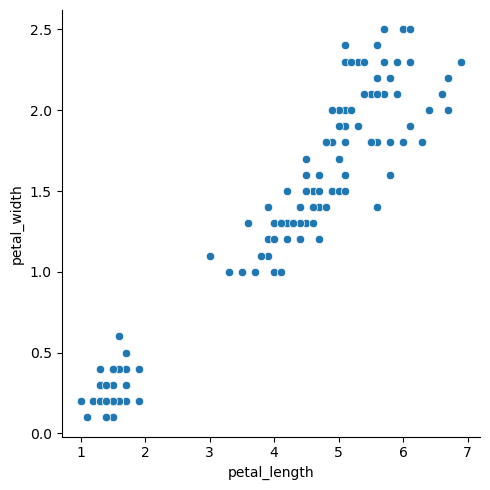

In [4]:
sns.relplot(x='petal_length', y='petal_width', data=iris)


### Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

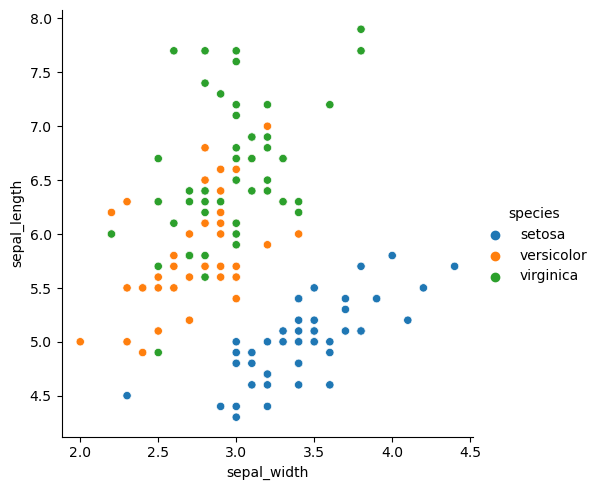

In [61]:
sns.relplot(x='sepal_width', y='sepal_length', hue='species', data=iris)

### Which features would be best used to predict species?

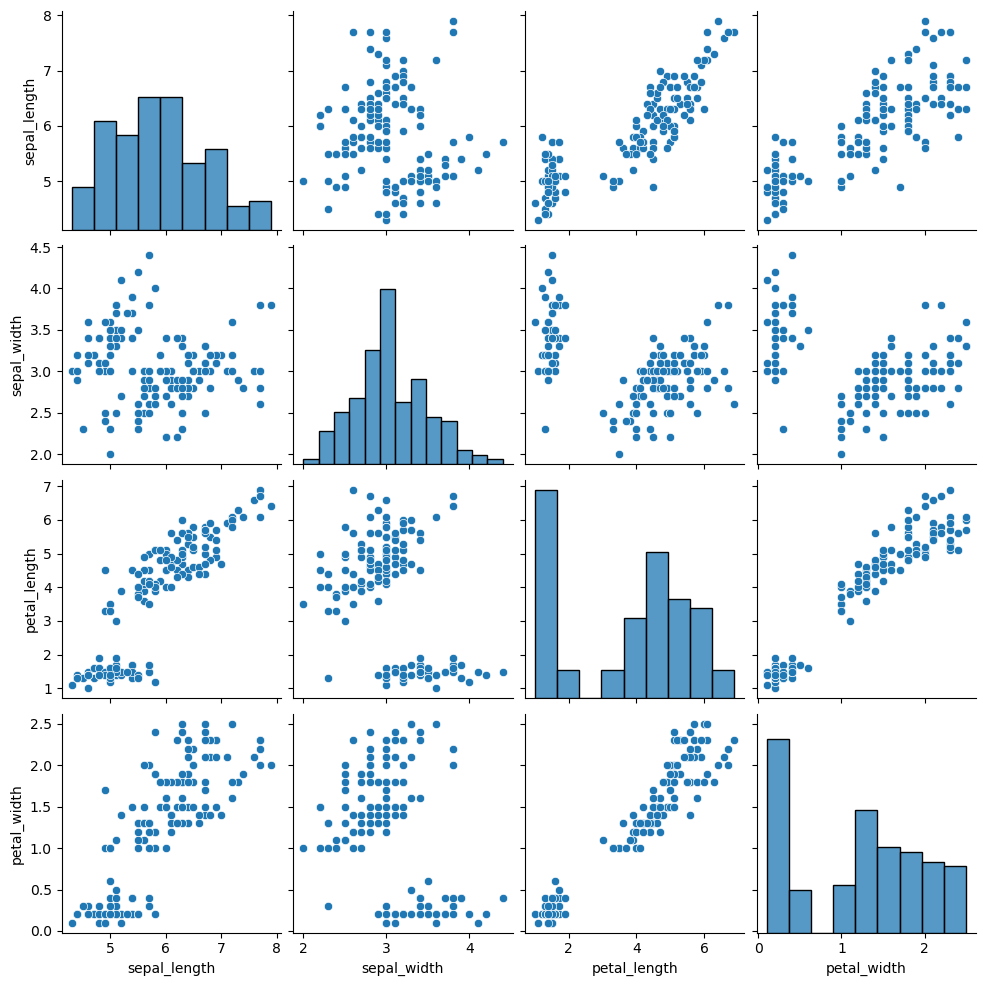

In [8]:
sns.pairplot(iris)

## Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

- Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [10]:
anscombe = sns.load_dataset('anscombe')

anscombe.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [16]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [22]:
from pydataset import data
sprays = data('InsectSprays')
sprays.dtypes

count     int64
spray    object
dtype: object

<AxesSubplot:xlabel='spray', ylabel='count'>

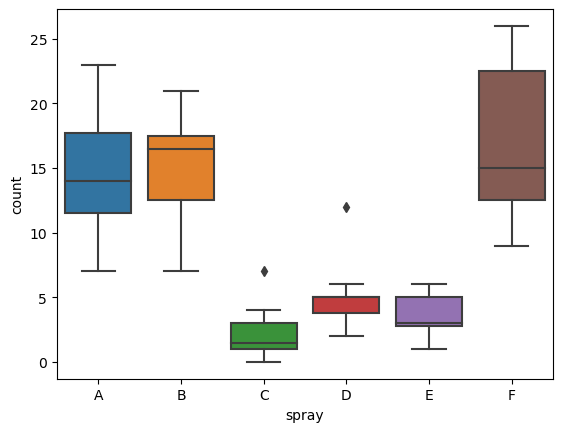

In [24]:
sns.boxplot(data=sprays, x='spray' , y='count')

## Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

- Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
- Does whether or not a province is Catholic influence fertility?
- What measure correlates most strongly with fertility?

In [28]:
swiss_df = data('swiss')
swiss_df.dtypes

Fertility           float64
Agriculture         float64
Examination           int64
Education             int64
Catholic            float64
Infant.Mortality    float64
dtype: object

In [35]:
swiss_df['is_catholic'] = swiss_df.Catholic > 50

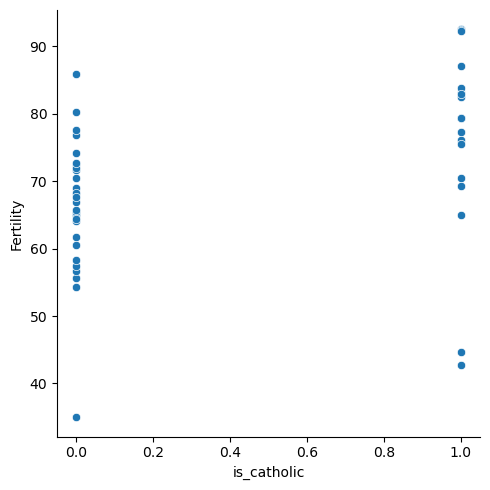

In [39]:
sns.relplot(x='is_catholic', y='Fertility', data=swiss_df)

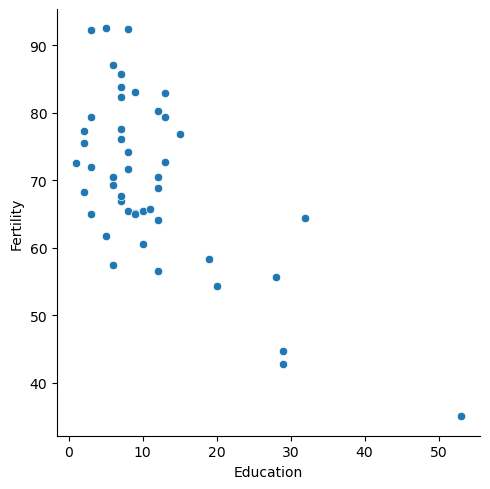

In [45]:
sns.relplot(x='Education', y='Fertility', data=swiss_df)

## Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [64]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/chipotle'

In [72]:
chipotle_db = pd.read_sql('SELECT * FROM orders', url)
chipotle_db.columns

Index(['id', 'order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [73]:
sns.barplot(x= 'item_name', y= 'item_price', data=chipotle_db)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

## Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [49]:
sleep_df = data('sleepstudy')
sleep_df.dtypes

Reaction    float64
Days          int64
Subject       int64
dtype: object

In [50]:
sleep_df

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


<AxesSubplot:xlabel='Subject', ylabel='Reaction'>

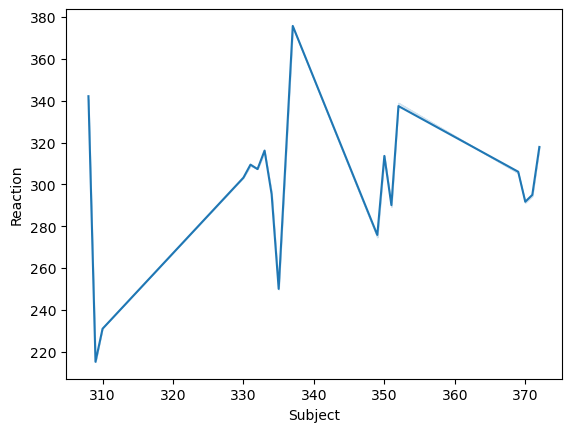

In [60]:
sns.lineplot(
data=sleep_df,
x='Subject',
y='Reaction',
ci=False)